In [1]:
%reset -f
# libraires librosa jouer avec des audios
import librosa
import librosa.display

# libraires jouer des audios
import soundfile as sf
import sounddevice as sd

# libraires jouer des audios mais avec le bouton - plus jolie
from IPython.display import Audio

# libraires classiques
import numpy as np
import matplotlib.pyplot as plt

# libraires PIL jouer avec des images
import PIL
from PIL import Image
import cv2

# For plotting headlessly
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

import scipy
import scipy.signal
import scipy.io.wavfile

C:\Users\ngotr\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


# 1. Transformer audio-spectrogram et spectrogram-audio

In [2]:
def audio_spectrogram(audio_file, sr, n_fft , hop_length , n_mels):
    # lire le fichier d'audio
    audio_data, sr = librosa.load(audio_file)
    
    #sgram = librosa.stft(audio_data)
    # décomposer en magnitude et phase
    #sgram_mag, _ = librosa.magphase(sgram)
    #magnitude, _ = librosa.effects.trim(audio_data)

    # Scaling mel
    S = librosa.feature.melspectrogram(y=audio_data, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)

    # Scaling logarithmique
    S_db = librosa.amplitude_to_db(S, ref=np.min)
    
    # Scaling [0,255] pour faciliter la normalisation d'après
    S_db_img = (255 * (S_db - np.min(S_db)) / (np.max(S_db) - np.min(S_db))).astype(np.uint8)
    
    im = Image.fromarray(S_db_img, mode='P')

    # Enregistrer en png
    im.save(audio_file[:-4] + ".png")

In [3]:
def spectrogram_audio(image, sr, n_fft, hop_length):
    # Lire l'image
    im = Image.open(image)
    img_array = np.array(im)
    # Convert à float32
    img_array = img_array.astype(np.float32)

    # convert en audio 
    wav = librosa.feature.inverse.mel_to_audio(M=img_array, sr=sr, n_fft=n_fft, hop_length=hop_length,power=3.0)

    # Enregistrer en wav
    sf.write("res_"+image[:-4]+ ".wav", wav, samplerate=sr, format = 'WAV')

In [4]:
n_fft = 2048 # longueur de la fenêtre FFT
hop_length = 512 # nombre d'échantillons entre les frames successives.
n_mels = 128 # nombre de bandes Mel à générer
data,sample_rate = librosa.load('preamble10.wav')

In [5]:
audio_spectrogram('preamble10.wav',sample_rate, n_fft , hop_length , n_mels)

In [6]:
spectrogram_audio('preamble10.png',sample_rate,n_fft,hop_length)

In [7]:
Audio('preamble10.wav')

In [8]:
Audio('res_preamble10.wav')

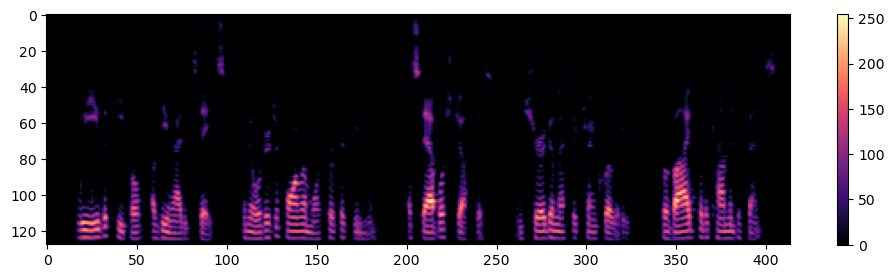

In [22]:
plt.figure(figsize=(12, 3))
im = Image.open('preamble10.png')
plt.imshow(cv2.flip(np.array(im),0), cmap = 'magma')
plt.colorbar()
plt.show()

In [10]:
print(np.shape(im)) # nbr ligne => nbr mel

(128, 414)


In [11]:
data2, sr2 = librosa.load('res_preamble10.wav')

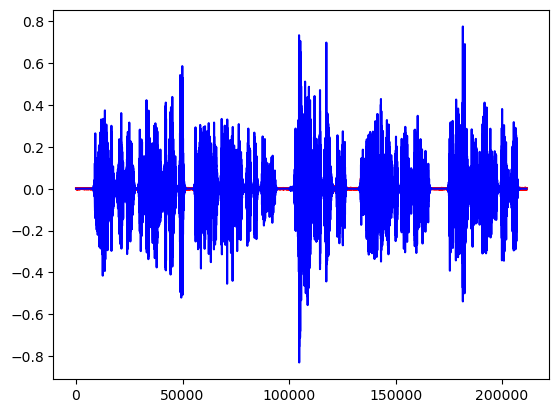

In [12]:
plt.plot(data, c= 'red')
plt.plot(data2, c= 'blue')

(10, 414)


C:\Users\ngotr\AppData\Local\Temp\ipykernel_10684\2074469513.py:1: FutureWarning: Pass y=[ 1.0986328e-03  8.8500977e-04  6.7138672e-04 ...  5.7983398e-04
 -3.0517578e-05 -4.2724609e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(data, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)


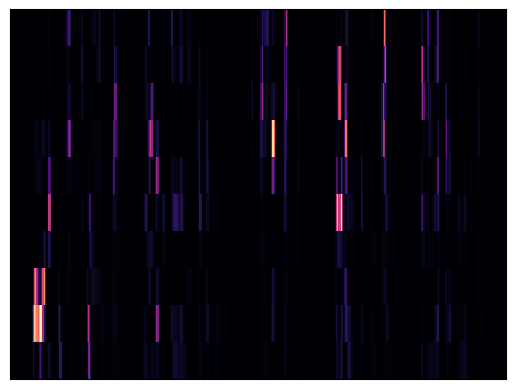

In [20]:

S = librosa.feature.melspectrogram(data, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)

S_zoomed = S[10:20, :] 
print(S_zoomed.shape)
time_values = librosa.times_like(S_zoomed, sr=sample_rate, hop_length=hop_length)

librosa.display.specshow(S_zoomed, sr=sample_rate, x_coords=time_values)

# 2. MNIST Audio